In [2]:
import requests
from datetime import datetime
from urllib import parse
import pandas as pd
import json
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
URL = "https://wikimedia.org/api/rest_v1/"
HEADERS = {"Accept":"application/json","user-agent":"test123@gmail.com"}
SESSION = requests.Session()

In [4]:
def get_pageviews(article: str, start: datetime, end: datetime, project="en.wikipedia.org",
                  access="all-access", agent="all-agents", granularity="daily"):
    """
        args:
            article: The name of the article
            start: Start date 
            end: End date
            project: The domain, default en.wikipedia.org
            access: Type of the device, default all-access. other options(Desktop, mobile-app, mobile-web)
            agent: Type of the agent, default all-agents. other options(user, spider, automated)
            granularity: The time unit, default daily. Other options(monthly)
            
    """
    params = [
        "metrics",
        "pageviews",
        "per-article",
        project.capitalize(),
        access,
        agent,
        parse.quote(article),
        granularity,
        start.strftime("%Y%m%d"),
        end.strftime("%Y%m%d")
    ]
    url = URL + "/".join(params)
    return SESSION.get(url,headers=HEADERS).json()["items"]

In [5]:
def store_pageviews(title, genre: str, data):
    """
        args:
            genre: options (Games,Film and TV, Literary, Music)
    """
    if genre.lower() not in ["games", "film and tv", "literary", "music"]:
        raise ValueError(
            "Genre must be an element of [Games, Film and TV, Literary, Music]")
    df = pd.DataFrame(data)
    df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y%m%d%H",)
    if not os.path.isdir("Data"):
        os.mkdir("Data")
    df.to_csv("Data/" + genre +
                "/" + title + ".csv", index=False)


def fetch_data_sources(page, filename):
    url = "https://www.wikitable2json.com/api/" + \
        page

    params = {"cleanRef": "true", "lang": "en"}
    request = SESSION.get(url=url, params=params, headers=HEADERS)
    resposne = request.json()
    table = np.squeeze(resposne)
    data = {}
    for i in range(len(table[0])):
      data[table[0, i]] = table[1:, i].tolist()
    df = pd.DataFrame(data)
    df.to_csv("Data/" + filename + ".csv", index=False)

#fetch_data_sources("List_of_video_games_considered_the_best", "Games_sources")

In [6]:
# df = pd.read_excel("Data/Games_sources.xlsx")
# df = df[df["Year"] >= 2000 ]
# for year,game in df.values[:,0:2]:
#     print(game,year)
#     if year < 2005:
#         year = 2005
#     data = get_pageviews(game,datetime(year,1,1),datetime(2022,1,1))
#     store_pageviews(game,"Games",data)

# dfs = []
# for file in os.listdir("Data/Games"):
#     if file.endswith(".csv"):
#         df = pd.read_csv("Data/Games/"+file)
#         dfs.append(df)
# new_df = pd.concat(dfs)
# new_df.to_csv("Data/All_Games.csv",index=False)


# def get_related_titles(article: str):
#     url = "https://en.wikipedia.org/api/rest_v1/page/related/" + article
#     data = SESSION.get(url,headers=HEADERS).json()["pages"]
#     titles = []
#     for i in data:
#         i = i["title"]
#         titles.append(i)
#     return titles
# gameNames = []
# for file in os.listdir("Data/Games"):
#     if file.endswith(".csv"):
#         x = file[0: len(file) - 4]
#         gameNames.append(x)

# for i in gameNames:
#     titles = get_related_titles(i)
#     df = pd.DataFrame(titles, columns=["related titles"])
#     df.to_csv("Data/Games/related/related to " + i + ".csv")



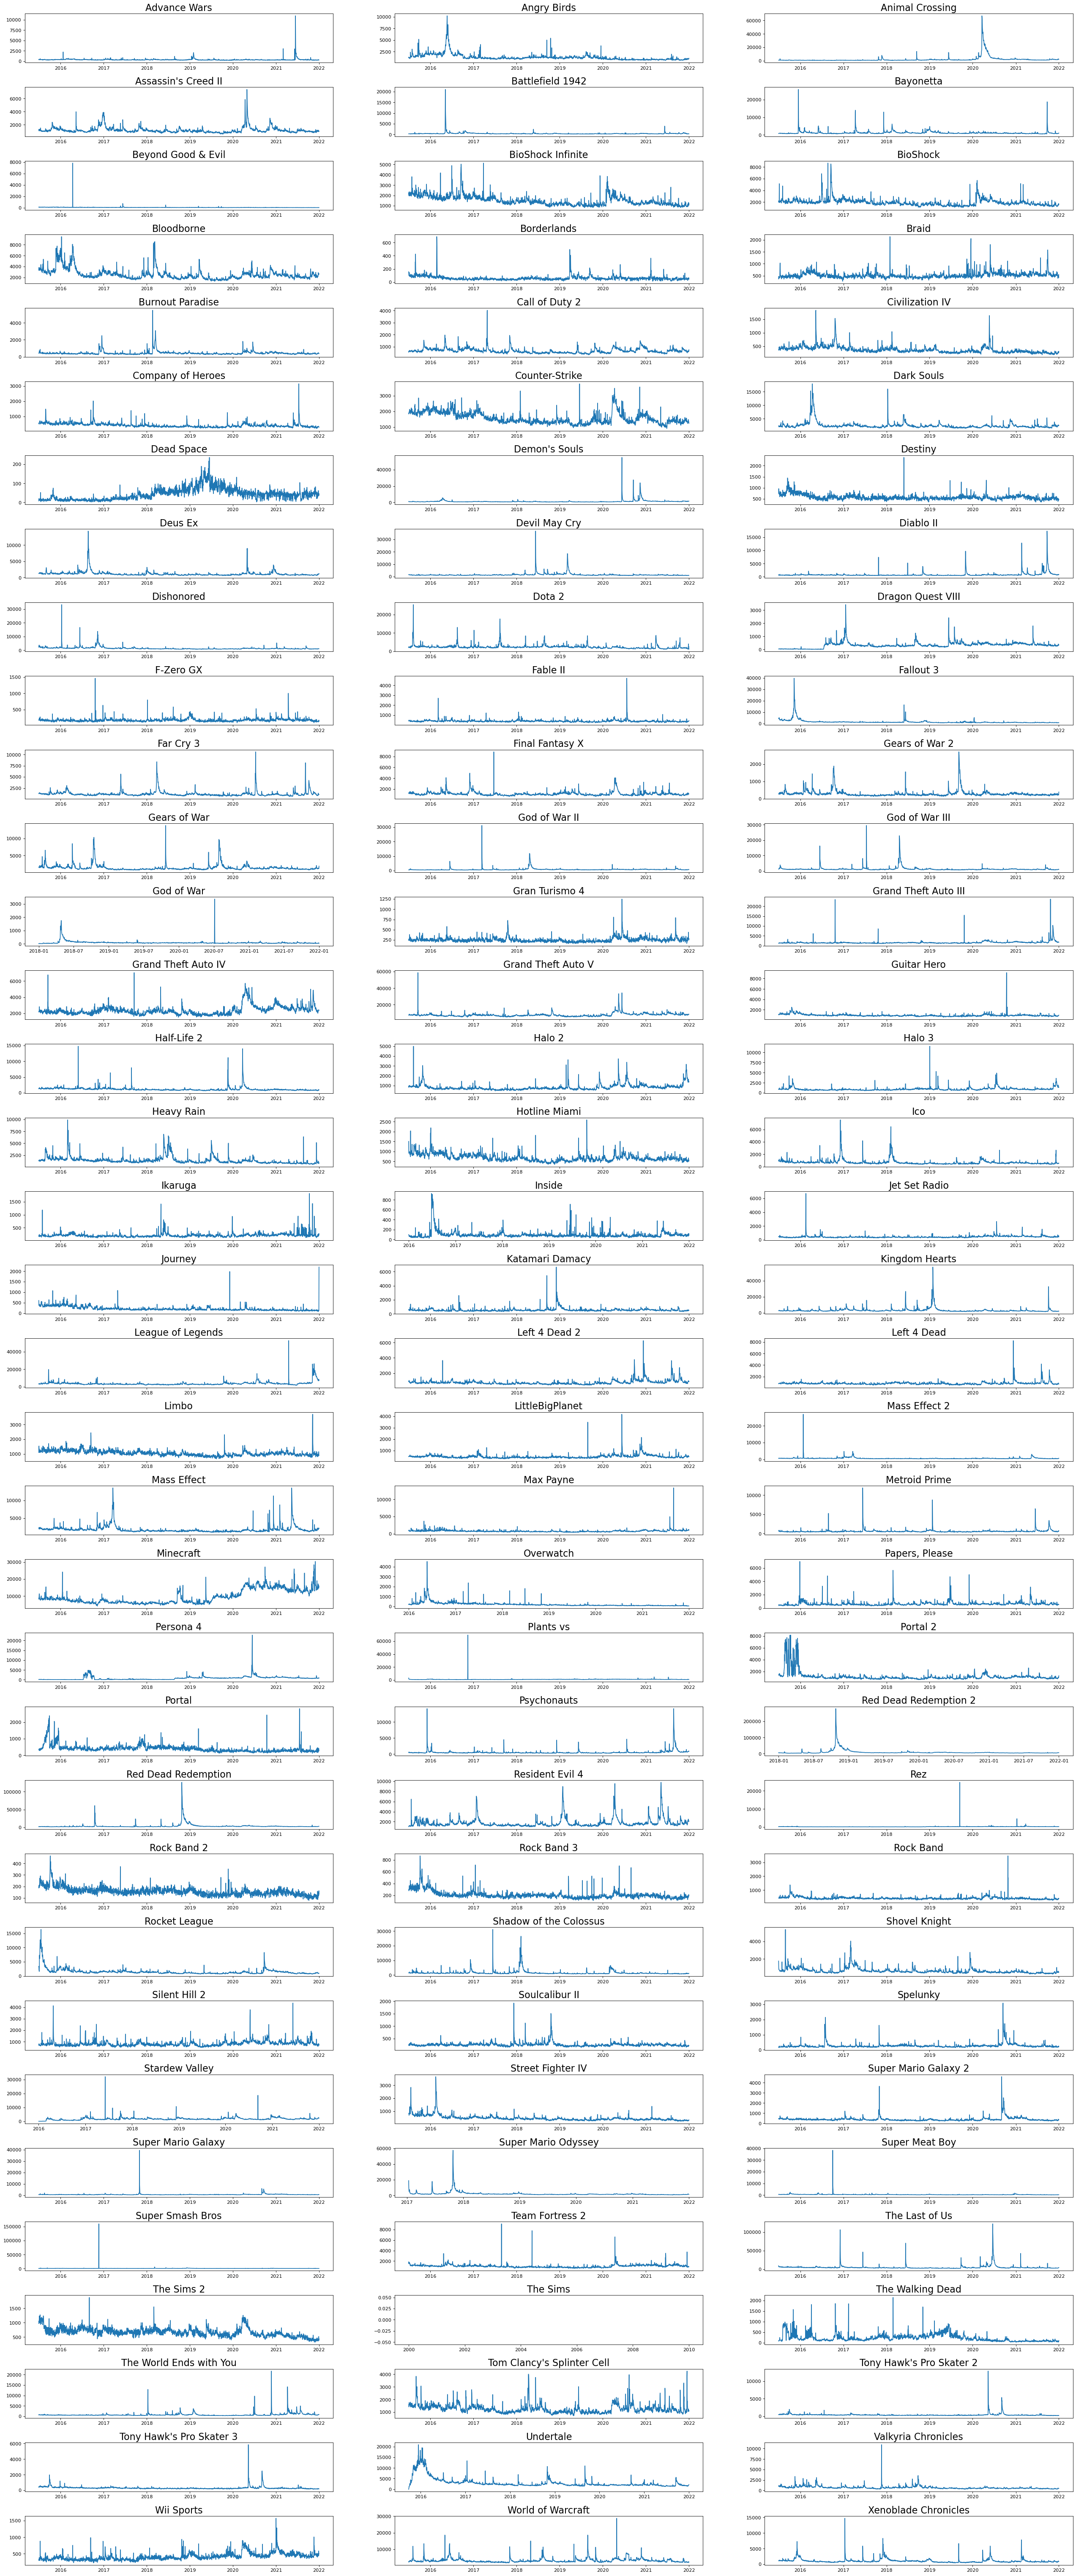

In [7]:
cols = 3
rows = 35
files = []
for file in os.listdir("Data/Games"):
    if file.endswith(".csv"):
        files.append(file)

fig, ax = plt.subplots(rows, cols, figsize=(40, 100), dpi=80)
for i in range(cols*rows):
    ax = plt.subplot(rows,cols,i+1)
    plt.subplots_adjust(hspace=0.5)
    df = pd.read_csv("Data/Games/"+files[i])
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    ax.set_title(files[i].split(".")[0],fontsize=20)
    ax.plot(df["timestamp"],df["views"])


In [42]:
def get_links(article: str, prop: str):

    "props = links or linkshere"

    if prop == "links":
        limit = "pllimit=max"
        con = "plcontinue="
    else:
        limit = "lhlimit=max"
        con = "lhcontinue="

    titles = []
    data = SESSION.get(f"https://en.wikipedia.org/w/api.php?action=query&format=json&titles={article}&prop={prop}&{limit}").json()
    data_continue = data

    data = to_links(data, prop)
    for i in data:
        titles.append(i["title"])

    while list(data_continue.keys())[0] == "continue":
        data_continue = data_continue["continue"]
        data_continue = data_continue[con[0:len(con)-1]]
        data_continue = SESSION.get(f"https://en.wikipedia.org/w/api.php?action=query&format=json&titles={article}&prop={prop}&{limit}&{con}{data_continue}").json()
        data_list = to_links(data_continue, prop)
        for i in data_list:
            titles.append(i["title"])

    return titles

def to_links(data: dict, prop: str):
    data = data["query"]
    data = data["pages"]
    data = data[list(data.keys())[0]]
    return data[f"{prop}"]

['British Museum', 'Video game', 'Esperantujo', 'Intellivision', 'Klingon language', 'Microsoft', 'Microserfs', 'May 18', 'Morphogenesis', 'Mattel', 'Ogg', 'Phantom', 'Reversi', 'Stockholm', 'Steampunk', 'Scrabble', 'Sonic the Hedgehog (character)', 'Turing completeness', 'Universe of The Legend of Zelda', 'History of video games', 'Vorbis', 'Xyzzy (computing)', '2000s', '1979', '2009', '2011', '2010s', 'Commander Keen', 'Nvidia', 'Lidar', 'Lua (programming language)', 'Roguelike', 'Internet relationship', 'Sun Tzu', 'Slash (punctuation)', 'Magic 8 Ball', 'Balderdash', 'Bicolor cat', 'Cabbage Patch Kids', 'Museum of Modern Art', 'Pac-Man', 'Pictionary', 'Strider', 'Cross-platform software', 'Matchbox (brand)', 'Castle in the Sky', 'Wikipedia:Unusual articles', 'Uno (card game)', 'Barbie', 'Timeline of musical events', 'Talk:Lapis lazuli', 'Gamer', 'List of file formats', 'Chemnitz', 'PayPal', 'List of fictional pigs', 'Talk:TNT', 'Thaumaturgy', 'MC (disambiguation)', 'Wikipedia:Six deg

3428

In [56]:
#file_names = []
#for files in os.listdir("Data/Games"):
#    if files.endswith(".csv"):
#        file_names.append(files[0:len(files)-4])


#for file in file_names:
#    df = pd.DataFrame(get_links(file, "links"), columns=["links"])
#    df.to_csv("Data/Games/Links/" + file + ".csv")

#for file in file_names:
#    df = pd.DataFrame(get_links(file, "linkshere"), columns=["linkshere"])
#    df.to_csv("Data/Games/linkshere/" + file + ".csv")

                                            linkshere
0                                           Duck Hunt
1                                    Game Boy Advance
2                           Mario Kart: Super Circuit
3                            Paper Mario (video game)
4                                       Tetris Attack
..                                                ...
215                 Talk:King of All Cosmos/Archive 1
216                      User talk:Graffiti master 32
217  User talk:2601:280:CA7F:9490:9498:FB85:1DC3:1946
218                                Fire Emblem Engage
219                  Draft:Advance Wars: Re-boot Camp

[220 rows x 1 columns]
                                              linkshere
0                                               Finland
1                                    Economy of Finland
2                                       Lucasfilm Games
3                                           Adobe Flash
4                                             St